Привет! 

Меня зовут Сергей, я Team lead в большой команде DS. Надеюсь мои советы помогут улучшить твой проект. 

Свои комментарии я буду оставлять в таких ячейках:

<div class="alert alert-block alert-success">
<b>Хорошо:</b> Все сделано верно
</div>

<div class="alert alert-block alert-warning">
<b>Замечания: </b> Есть что улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Необходимо исправить:</b> Требуется изменить код. С такими ошибками проект не принимается.
</div>

Пожалуйста, не удаляй мои комментарии

## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Часть 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd # импорт библеотеки pandas
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/data.csv') # чтение датасета с сохранением в переменной df

### Выведем первые и последние строки таблицы

In [3]:
df.head() # верхние 5 строк

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
df.tail() # нижние 5 строк

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


<div class="alert alert-block alert-success">

* верхние 5 строк - df.head()
* нижние 5 строк - df.tail()

</div>


## Общая информация о таблице

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df.columns # вывод названия столбцов

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

Всего в таблице 12 столбцов, 21525 строк. Количество строк в столбцах days_employed и total_income отличается, это говорит о том что в данных есть пустые значения. Типы данных встречающие в столбцах float, int и object.
Разберем какие столбцы какую информацию содержат:

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита


## Проверим наличие дубликатов и пропусков 

In [7]:
df.duplicated().sum() # дубликаты 

54

In [8]:
df.isna().sum() # пропуски

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

## Найдем некорректные данные в датасете

### Сгруппируем данные по количеству детей

In [9]:
df.groupby('children')['children'].count()

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64

<div class="alert alert-block alert-success">

ОТлично! Аналогичный результат можно получить так df.children.value_counts()

</div>


### Посчитаем количество отрицательных значений для трудового стажа

In [10]:
df[df['days_employed'] < 0]['days_employed'].count()

15906

In [11]:
df['total_income'].isnull().sum() # количество NaN строк в трудовом стаже

2174

### Проверим положительные значения 

In [12]:
df[df['days_employed'] > 0]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904.866406,53,среднее,1,гражданский брак,1,M,пенсионер,0,75439.993167,сыграть свадьбу
21508,0,386497.714078,62,среднее,1,женат / замужем,0,M,пенсионер,0,72638.590915,недвижимость
21509,0,362161.054124,59,высшее,0,женат / замужем,0,M,пенсионер,0,73029.059379,операции с недвижимостью
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем


### Проверим возрастные категории 

In [13]:
df.groupby('dob_years')['dob_years'].count()

dob_years
0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

### Проверим категории образования

In [14]:
df.groupby('education')['education'].count()

education
ВЫСШЕЕ                   274
Высшее                   268
НАЧАЛЬНОЕ                 17
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
Начальное                 15
Неоконченное высшее       47
СРЕДНЕЕ                  772
Среднее                  711
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
высшее                  4718
начальное                250
неоконченное высшее      668
среднее                13750
ученая степень             4
Name: education, dtype: int64

### Сгруппируем данные по гендерному признаку

In [15]:
df.groupby('gender')['gender'].count()

gender
F      14236
M       7288
XNA        1
Name: gender, dtype: int64

### Сгруппируем данные по семейному положению

In [16]:
df.groupby('family_status')['family_status'].count()

family_status
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
гражданский брак          4177
женат / замужем          12380
Name: family_status, dtype: int64

### Сгруппируем данные по социальному статусу 

In [17]:
df.groupby('income_type')['income_type'].count()

income_type
безработный            2
в декрете              1
госслужащий         1459
компаньон           5085
пенсионер           3856
предприниматель        2
сотрудник          11119
студент                1
Name: income_type, dtype: int64

### Проверим данные дохода

In [18]:
df[df['total_income'] == 0]['total_income'].count() # на наличие нулевых

0

In [19]:
df[df['total_income'] < 0]['total_income'].count() # на отрицательные значения

0

In [20]:
df['total_income'].isnull().sum() # количество строк в которых пропущена информация о доходах

2174

### Цели получения кредита

In [21]:
df['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

### Вывод

1. В датасете 54 дубликата, количество дубликатов может измениться после базовой предобработки.
2. Одинаковое количество пропусков в столбцах days_employed и total_income – 2 174. У банка отсуствует данная информация скорее всего из-за того что некоторые люди могли официально не работать и как следствие отследить реальный трудовой стаж и доходы сложно. Столбец total_income будет использоваться для анализа зависимости между уровнем дохода и возвратом кредита в срок, поэтому эти записи использовать нельзя, менять на средние значение отсуствиющую информацию по этим столбац будет необъективным шагом.
3. В столбце children 47 записей имеют отрицательное значение -1, возможно это связанно с некорректной выгрузной данных, возможно банк обозначил таким образом погибших детей, а может клиенты знак минус случайно или в шутку поставили, проверить эти записи и удостовериться в их корректности не представляется возможным, поэтому уберем их из анализа. У 76 человек отмеченно по 20 детей, необходимо учесть, что при использовании эти данные могут значительно повлиять на средние величины;
4. Столбец days_employed (трудовой стаж) имеет тип float64 и содержит отрицательные значения. Всего таких записей 15 906 , т.е. ~73% от общего числа, необходимо привести к формату int64, потому что мы оцениваем количество дней как целое число, дробная часть не информативна и убрать знак минус перед всеми значениями. Положительные значения из датасета выглядят странными. Например, 343937.404131 / 365 дней = 942 лет стажа. Можно отметить, что такой стаж в основном у пенсионеров, возможно их реальный стаж оценить невозможно, но для того чтобы не терять остальные данные, трудовой стаж заменили на значения, которые сильно выделяются. В решении задачи трудовой стаж не используется, но возможно при дальнейшем анализе он мог бы пригодиться 
5. Столбец dob_years – для 101 человека возраст неизвестен и отмечен значением 0. Для ответа на вопросы бизнеса этот стоблец не используется. Возьмем на заметку и оставим как есть 
6. В столбце education встречаются категории с регистром, но одинаковым смысловым значением – нужно будет привести к единому виду, например, все в lowercase. И еще раз проверить на дубликаты. Предварительно убедимся в том, что education_id соотносится с нужным типом образования;
7. В столбце family_status только одна категория Не женат / не замужем выбивается из общей семантики именования – начинается с заглавной буквы;
8. У одного клиента неизвестен пол, возможно он/она еще сам не определился, для анализа этот столбец не используется, запись можно оставить;
9. Столбец purpose содержит разные формулировки одних и тех же целей – применим лемматизацию.

<div class="alert alert-block alert-success">
Выводы в целом верные, отмечены основные проблемы
</div>


### Часть 2. Предобработка данных

### Замена типа данных и обработка пропусков

In [22]:
df['education'] = df['education'].str.lower() # приведем уровень образования к нижнему реестру для корректной группировки данных по средним значениям

# скопируем таблицу для опредения медианных значений и заполнения пустылх данных
ds = df.copy() 
ds.isna().sum()


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [23]:
# избавляемся от пропущенных значений, чтобы корректно определить среднии значения по группам, тк NaN должен иметь тип float, с ним перевести столбец в формат int не получится
ds = ds.dropna()
ds.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [24]:
ds['days_employed'] = ds['days_employed'].astype('int').apply(abs) # замена типа данных и перевод отрицательных значений в положительные
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19351 entries, 0 to 21524
Data columns (total 12 columns):
children            19351 non-null int64
days_employed       19351 non-null int64
dob_years           19351 non-null int64
education           19351 non-null object
education_id        19351 non-null int64
family_status       19351 non-null object
family_status_id    19351 non-null int64
gender              19351 non-null object
income_type         19351 non-null object
debt                19351 non-null int64
total_income        19351 non-null float64
purpose             19351 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 1.9+ MB


In [25]:
# Составим сводную таблицу маппинга, который нужен при заполнении пропусков дней стажа
df_median = ds.pivot_table(index=['education', 'income_type'], values=['days_employed', 'total_income'] , aggfunc='median')
print(df_median)


                                     days_employed   total_income
education           income_type                                  
высшее              безработный           395302.0  202722.511368
                    госслужащий             2530.5  172511.107016
                    компаньон               1454.5  201785.400018
                    пенсионер             366158.0  144240.768611
                    предприниматель          520.0  499163.144947
                    сотрудник               1556.0  165640.744634
                    студент                  578.0   98201.625314
начальное           госслужащий             2787.0  148339.290825
                    компаньон               1151.0  136798.905143
                    пенсионер             360264.0  102598.653164
                    сотрудник               1197.0  125994.910603
неоконченное высшее госслужащий             1884.5  160592.345303
                    компаньон               1017.0  179867.152890
          

In [26]:
# Напишем функцию заполнения пропусков дней стажа на основе сводной таблицы
def fill_days_employed(row):
    return df_median.loc[row['education']].loc[row['income_type']]['days_employed']

In [27]:
# Восстановим пропуски при помощи вычисленных значений
df.loc[df['days_employed'].isnull(), 'days_employed'] = df.apply(fill_days_employed, axis=1)

<div class="alert alert-block alert-success">
Прежде чем так делать -следует каким-то образом решить проблему с отрицательными значениями в days_employed, например использовать abs()
</div>
Сделал

In [28]:
def fill_total_income(row):
    return df_median.loc[row['education']].loc[row['income_type']]['total_income']

In [29]:
# Восстановим пропуски при помощи вычисленных значений
df.loc[
    df['total_income'].isnull(), 'total_income'
] = df.apply(fill_total_income, axis=1)
df.isna().sum()


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [30]:
# переведем исходый датафрей в формат int и замений отрицательные значения на положительные 
df['days_employed'] = df['days_employed'].astype('int').apply(abs)
print(df[df['days_employed']<0].count)
df.info()

<bound method DataFrame.count of Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


In [31]:
# Избавляемся от записей, в которых есть ошибочные данные
df = df[df['children'] >= 0]


In [32]:
print(df.head())

   children  days_employed  dob_years education  education_id  \
0         1           8437         42    высшее             0   
1         1           4024         36   среднее             1   
2         0           5623         33   среднее             1   
3         3           4124         32   среднее             1   
4         0         340266         53   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0      M   сотрудник     0  145885.952297   
3   женат / замужем                 0      M   сотрудник     0  267628.550329   
4  гражданский брак                 1      F   пенсионер     0  158616.077870   

                      purpose  
0               покупка жилья  
1     приобретение автомобиля  
2               покупка жи

In [33]:
#df['days_employed'] = df['days_employed'].astype('int').apply(abs)

<div class="alert alert-block alert-success">
вот эту строку стоит переместить выше по коду + использовать copy()

</div>
 **Сделал**

### Вывод

Заполнили пропущенные данные трудового стажа и дохода, по медианным значениям, с использованием категории (образование) и подкатегорий (социальный статус). Преобразовали трудовой стаж в int с помощью метода astype, потому что он выражен в днях, заменили на положительные значения.

### Обработка дубликатов

In [34]:
df.duplicated().sum() # проверим количество дубликатов

71

После обработки данных число дубликатов увеличилось

In [35]:
df = df.drop_duplicates().reset_index(drop
= True)

In [36]:
df.duplicated().sum()

0

### Вывод

Дубликаты были удалены из датасета

### Лемматизация

In [37]:
from collections import Counter

# Воспользуемся библиотекой Mystem от Яндекса
from pymystem3 import Mystem
m = Mystem()



# Попробуем найти самые частовстречаемые слова в леммах и на основе результата определить категории целей кредита
purposes = []

for p in df['purpose']:
    lemma = m.lemmatize(p)
    purposes += filter(lambda l: l not in [' ', '\n', 'с', 'со', 'на'], lemma)

print(Counter(purposes))

Counter({'недвижимость': 6335, 'покупка': 5884, 'жилье': 4452, 'автомобиль': 4295, 'образование': 4003, 'операция': 2597, 'свадьба': 2322, 'свой': 2223, 'строительство': 1874, 'высокий': 1373, 'получение': 1312, 'коммерческий': 1310, 'для': 1288, 'жилой': 1225, 'сделка': 940, 'заниматься': 904, 'дополнительный': 903, 'проведение': 767, 'сыграть': 764, 'сдача': 650, 'семья': 638, 'собственный': 634, 'ремонт': 606, 'подержанный': 485, 'подержать': 477, 'приобретение': 459, 'профильный': 434})


In [38]:
# В приведенном выше множестве мы вимим общие слова типа "покупка", "операция", "строительство" и пр.
# Если их откинуть, то наиболее частовстречаемыми категориями будут:
purpose_category = {'недвижимость':['недвижимость','жилье'],
    'свадьба':['свадьба'],
    'автомобиль':['автомобиль'],
    'образование':['образование']
                   }


In [39]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

<div class="alert alert-block alert-success">
Нам точно стоит объеденить категории жилье и недвижимость, например:
    
* покупка жилья
* покупка жилой недвижимости   
* операции со своей недвижимостью

идентичны по смыслу
</div>
- добавил словарь и создал ключи изменил функцию, для подпора по ключам

In [40]:
# Опишем функцию, которую будем вызывать при добавлении нового стобца
def categorize_purpose(row):
    purpose = row['purpose']
    for lemma in m.lemmatize(purpose):
        for key, list_values in purpose_category.items():
            if lemma in list_values:
                return key
    return 'прочее'
    

In [41]:
# Добавим новый столбец с категориями целей кредита
df['purpose_category'] = df.apply(categorize_purpose, axis = 1)
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,свадьба


In [42]:
# df['purpose_category'].value_counts()

### Вывод

Определили пять основных категорий для получения кредита.

### Категоризация данных

В нашем задаче, есть 4 поставленных вопроса, необходимо по ним категоризировать данные в случае с детьми разделим их по количеству
0 - "детей нет"
до 2 включительно - "дети есть"
больше 2 - "многодетные"
больше 5 - "очень много детей"

In [43]:
def categorize_children(count):
    if count == 0:
        return 'детей нет'
    if count <= 2:
        return 'дети есть'
    if count <= 5:
        return 'многодетные'
    return 'очень много детей'   
df['children_category'] = df['children'].apply(categorize_children)
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,children_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,недвижимость,дети есть
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,автомобиль,дети есть
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,недвижимость,детей нет
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,образование,многодетные
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,свадьба,детей нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21402,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем,недвижимость,дети есть
21403,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем,автомобиль,детей нет
21404,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость,недвижимость,дети есть
21405,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,автомобиль,многодетные


Для семейного положения можно определить две категории:

"в браке" – женат / замужем, гражданский брак

"не в браке" – не женат / не замужем, в разводе, вдовец / вдова

In [44]:
def categorize_family_status(value):
    if value == 'женат / замужем' or value == 'гражданский брак':
        return 'в браке'
    return 'не в браке'

df['family_status_category'] = df['family_status'].apply(categorize_family_status)
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,children_category,family_status_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,недвижимость,дети есть,в браке
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,автомобиль,дети есть,в браке
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,недвижимость,детей нет,в браке
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,образование,многодетные,в браке
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,свадьба,детей нет,в браке
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21402,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем,недвижимость,дети есть,в браке
21403,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем,автомобиль,детей нет,в браке
21404,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость,недвижимость,дети есть,в браке
21405,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,автомобиль,многодетные,в браке


<div class="alert alert-block alert-success">
Вполне возможно и так
</div>

Для того чтобы разделить категории по уровеням дохода опредлим медианное и максимальное значение из предварительного анализа знаем, что минимальное значение равно 0

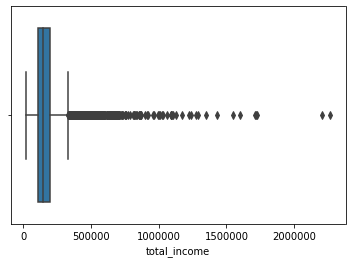

In [56]:
sns.boxplot(x='total_income', data=df);

In [46]:
df.total_income.describe()

count    2.140700e+04
mean     1.654814e+05
std      9.834494e+04
min      2.066726e+04
25%      1.074959e+05
50%      1.437088e+05
75%      1.983544e+05
max      2.265604e+06
Name: total_income, dtype: float64

In [47]:
# df.total_income.describe()

In [48]:
def categorize_total_income(value):
    if value < 50_000:
        return 'низкий'
    elif value <= 150_000:
        return 'средний'
    elif value < 350_000:
        return 'высокий'
    return 'очень высокий'

<div class="alert alert-block alert-success">
Можно также использовать квантили или вообще обратиться к официальным источникам
</div>

In [49]:
df['total_income_category'] = df['total_income'].apply(categorize_total_income)
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,children_category,family_status_category,total_income_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,недвижимость,дети есть,в браке,высокий
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,автомобиль,дети есть,в браке,средний
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,недвижимость,детей нет,в браке,средний
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,образование,многодетные,в браке,высокий
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,свадьба,детей нет,в браке,высокий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21402,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем,недвижимость,дети есть,в браке,высокий
21403,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем,автомобиль,детей нет,в браке,высокий
21404,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость,недвижимость,дети есть,в браке,средний
21405,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля,автомобиль,многодетные,в браке,высокий


### Вывод

Данные были категорезированны, можно переходить к ответам на поставленные вопросы.

### Часть 3. Анализ данных

- Определим зависимость между наличием детей и возвратом кредита в срок

In [50]:
print(df.groupby('children_category')['debt'].mean().sort_values(ascending=False))


children_category
очень много детей    0.105263
дети есть            0.093003
многодетные          0.081579
детей нет            0.075438
Name: debt, dtype: float64


In [51]:
# df.groupby('children_category')['debt'].mean().sort_values(ascending=False)

<div class="alert alert-block alert-success">
Рекомендую писать код в одну строку там где это возможно, это крайне упрощает анализ и поможет вашим будущим коллегам :)
</div>

### Вывод

Значительного влияния на кредитоспособность, в данных прослеживается увеличение кредитоспособности с увеличением числа детей и небольшая просадка по кредитоспосбности у многодетных клиентов, но при этом важно отметить, что количество выборки значительно отличается, например детей нет у 14891 клиента, а многодетных клиентов всего 300

- Определеим зависимость между семейным положением и возвратом кредита в срок

In [52]:
print(df.groupby('family_status_category')['debt'].mean().sort_values(ascending=False))

family_status_category
не в браке    0.085235
в браке       0.080092
Name: debt, dtype: float64


### Вывод

Можно сделать вывод о том семейное положение не влияет на кредитоспособность, у клиентов не стостоящих в браке кредитоспособность выше на 0,5%, но при этом нужно учитывать что их в 3 раза меньше, при одинаковом количестве данных можно предположить, что эти значения приблизительно равны

- Зависимость между уровнем дохода и возвратом кредита в срок

In [53]:
print(df.groupby('total_income_category')['debt'].mean().sort_values(ascending=False))

total_income_category
средний          0.085719
высокий          0.078328
очень высокий    0.064028
низкий           0.061995
Name: debt, dtype: float64


### Вывод

Возврат кредита зависит от уровня дохода клиента: чем выше доход, тем меньше % задолжностей. Но есть исключение. Люди с низким уровнем дохода имеют самый низкий процент задолжностей по кредитам: ~6.2%, а вот люди со средним – самый высокий ~8.5%

- Определим влияние целей кредита на его возврат в срок

In [54]:
print(df.groupby('purpose_category')['debt'].mean().sort_values(ascending=False))

purpose_category
автомобиль      0.093597
образование     0.092431
свадьба         0.080103
недвижимость    0.072495
Name: debt, dtype: float64


### Вывод

Посчитав % задолжностей по категориям, можно сделать вывод, что автомобиль 9.3% и образование 9.2% не на первом месте в списке приоритетов на выплаты у клиентов, в отличие от недвижимости 7.2% и свадьбы 8%.

### Шаг 4. Общий вывод

Исходя из предыдущих выводов, мы можем сделать следующую рекомедацию бизнесу по выдаче кредита: безопаснее всего выдавать кредиты на покупку жилья, недвижимости или свадьбу – по ним меньшее количество задолжностей.

Для более детального ответа необходимо рассмотреть следующие факты в совокупности:

- Оценить клиенто у которых нет детей  
- Рассмотреть различные возрастные группы, зависимость между стажем и доходом.
- С низким или высоким уровнями дохода 
- Цель кредита – жилье или недвижимость 

<div class="alert alert-block alert-success">


#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции, названия переменных передают смысл операций. В качестве совета предлагаю глубже изучить и начать применять конструкцию try-except в решении задачи — это улучшит отказоустойчивость кода и обезопасит код от поломок в будущем.

#### Выводы

У тебя отлично получается анализировать сложные данные, выдвигать корректные гипотезы и проверять свои выводы на возможность соответствия реальности. Видно глубокое понимание сути проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, так держать! 
    
    
#### Отлично!
    

</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.